In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the World Bank Excel file.

worldbank = pd.read_excel('WorldBank.xlsx')

In [3]:
# Use "GDP" and "GDP per Capita" to calculate population in millions and create a "Population (M)" column.

worldbank['Population (M)'] = (worldbank['GDP (USD)'] / 1000000) / worldbank['GDP per capita (USD)']
worldbank.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000,9575.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079,29.956728
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703,115.803824
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000,0.008913
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000,1.051937
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000,5.390515
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250,17.075158
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000,1391.895280


In [4]:
# Perform basic profiling & QA on the data.

worldbank.info(show_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [5]:
worldbank.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [6]:
worldbank.rename(columns={'Country Name': 'country_name', 
                          'Country Code': 'country_code',
                          'Region': 'region',
                          'IncomeGroup': 'income_group',
                          'Year': 'year',
                          'Birth rate, crude (per 1,000 people)': 'birth_rate_pk',
                          'Death rate, crude (per 1,000 people)': 'death_rate_pk',
                          'Electric power consumption (kWh per capita)': 'kwh_pc',
                          'GDP (USD)': 'gdp_usd',
                          'GDP per capita (USD)': 'gdp_pc_usd',
                          'Individuals using the Internet (% of population)': 'internet_usage_pct',
                          'Infant mortality rate (per 1,000 live births)': 'infant_mort_pk',
                          'Life expectancy at birth (years)': 'life_exp', 
                          'Population density (people per sq. km of land area)': 'density_per_km2',
                          'Unemployment (% of total labor force) (modeled ILO estimate)': 'unemployment_pct',
                          'Population (M)': 'population_mm'},
                 inplace=True)

In [7]:
worldbank = worldbank.assign(country_name = worldbank['country_name'].astype('category'),
                             country_code = worldbank['country_code'].astype('category'),
                             region = worldbank['region'].astype('category'),
                             income_group = worldbank['income_group'].astype('category'),
                             year = worldbank['year'].astype('int16'))
worldbank.info(show_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country_name        12449 non-null  category
 1   country_code        12449 non-null  category
 2   region              12449 non-null  category
 3   income_group        12449 non-null  category
 4   year                12449 non-null  int16   
 5   birth_rate_pk       11440 non-null  float64 
 6   death_rate_pk       11416 non-null  float64 
 7   kwh_pc              5848 non-null   float64 
 8   gdp_usd             9578 non-null   float64 
 9   gdp_pc_usd          9575 non-null   float64 
 10  internet_usage_pct  5064 non-null   float64 
 11  infant_mort_pk      9984 non-null   float64 
 12  life_exp            11176 non-null  float64 
 13  density_per_km2     11845 non-null  float64 
 14  unemployment_pct    5208 non-null   float64 
 15  population_mm       9575 non-null   

In [8]:
worldbank.describe().round()

,year,birth_rate_pk,death_rate_pk,kwh_pc,gdp_usd,gdp_pc_usd,internet_usage_pct,infant_mort_pk,life_exp,density_per_km2,unemployment_pct,population_mm
count,12449.0,11440.0,11416.0,5848.0,9.578000e+03,9575.0,5064.0,9984.0,11176.0,11845.0,5208.0,9575.0
mean,1989.0,29.0,11.0,3175.0,1.700740e+11,8232.0,23.0,52.0,64.0,319.0,8.0,30.0
std,17.0,13.0,5.0,4467.0,8.979866e+11,16174.0,28.0,46.0,11.0,1593.0,6.0,116.0
min,1960.0,7.0,1.0,0.0,8.824450e+06,35.0,0.0,1.0,19.0,0.0,0.0,0.0
25%,1974.0,17.0,7.0,390.0,1.393010e+09,513.0,1.0,14.0,56.0,20.0,4.0,1.0
50%,1989.0,28.0,9.0,1542.0,7.275305e+09,1853.0,8.0,37.0,67.0,64.0,7.0,5.0
75%,2004.0,41.0,13.0,4314.0,4.857782e+10,7775.0,41.0,78.0,73.0,145.0,11.0,17.0
max,2018.0,58.0,54.0,54799.0,2.050000e+13,189171.0,100.0,279.0,85.0,21389.0,38.0,1392.0


In [9]:
# Filter the data to 2014 and join it with the HDI csv file on "Country Code".

hdi = pd.read_csv('HDI.csv')
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Columns: 1008 entries, iso3 to mf_2021
dtypes: float64(1004), object(4)
memory usage: 1.6+ MB


In [10]:
wb_hdi_2014 = (worldbank
               .query('year == 2014')
               .merge(hdi.loc[:, ['iso3', 'hdi_2014']], how='left', left_on='country_code', right_on='iso3')
               .drop('iso3', axis=1)
               )
wb_hdi_2014.head()

,country_name,country_code,region,income_group,year,birth_rate_pk,death_rate_pk,kwh_pc,gdp_usd,gdp_pc_usd,internet_usage_pct,infant_mort_pk,life_exp,density_per_km2,unemployment_pct,population_mm,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,0.871


In [11]:
# Create a "gdp_pivot" table with years as rows, regions as columns, sum of GDP as values.

worldbank['gdp_usd_mm'] = worldbank['gdp_usd'] / 1000000
worldbank['gdp_usd_b'] = worldbank['gdp_usd'] / 1000000000

gdp_pivot = worldbank.pivot_table(index='year', columns='region', values='gdp_usd_b', aggfunc='sum')

gdp_pivot.tail()

region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
year,,,,,,,
2014,21253.838889,23683.30752,6407.378903,3493.32084,19300.0,2582.51859,1825.987072
2015,21147.391208,20403.26243,5093.158173,3078.62184,19750.0,2694.09123,1660.460776
2016,21818.989621,20347.37637,4981.861817,3081.31407,20230.0,2919.58324,1544.818535
2017,23236.301450,21494.27795,5517.267877,3206.35467,21150.0,3345.48536,1675.318140
2018,25239.764674,23008.54020,5221.480462,3038.18968,22210.0,3461.88356,1694.665417


In [12]:
# Creating a GDP per capita pivot for use in the final GridSpec as add-ons

gdp_pc_gb = worldbank.groupby(['region', 'year']).agg({'gdp_usd': 'sum', 'population_mm': 'sum'})

gdp_pc_gb['true_pc'] = (gdp_pc_gb['gdp_usd'] / 1000000) / gdp_pc_gb['population_mm']

gdp_pc_gb = gdp_pc_gb.reset_index()

gdp_pc_pivot = gdp_pc_gb.pivot_table(index='year', columns='region', values='true_pc', aggfunc='sum')

gdp_pc_pivot.tail()

region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
year,,,,,,,
2014,9631.457615,26289.158573,10395.386131,8736.909401,54612.437676,1494.502870,1893.885895
2015,9505.588833,22547.348956,8597.488511,7540.254833,55471.452691,1541.733400,1676.136159
2016,9752.342985,22376.948348,8303.826770,7398.300441,56329.851862,1648.669295,1518.008928
2017,10308.949557,23544.333954,9107.727445,7547.890160,58425.283476,1867.152643,1619.810936
2018,11120.553502,25096.542922,8709.683163,8662.208641,60971.881163,1905.807769,1595.548904


In [13]:
# Create "pop_pivot" table with years as rows, regions as columns, and sum of population as values.

worldbank['population_b'] = worldbank['population_mm'] / 1000

pop_pivot = worldbank.pivot_table(index='year', columns='region', values='population_b', aggfunc='sum')

pop_pivot.tail()

region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
year,,,,,,,
2014,2.206711,0.900877,0.616368,0.399835,0.353399,1.728012,0.964148
2015,2.224732,0.904907,0.592401,0.408291,0.356039,1.747443,0.990648
2016,2.237307,0.909301,0.599948,0.416489,0.359135,1.770873,1.017661
2017,2.253993,0.912928,0.605779,0.424801,0.362001,1.791758,1.034268
2018,2.269650,0.916801,0.599503,0.350741,0.364266,1.816491,1.062121


In [14]:
# Create "wb_hdi_by_region" table by calculating the average HDI for each region 
# and sorting from highest average HDI to lowest.

wb_hdi_by_region = (wb_hdi_2014.groupby('region').agg({'hdi_2014': 'mean'})
                    .sort_values(by='hdi_2014', ascending=False))

wb_hdi_by_region = (wb_hdi_by_region
                    .merge(wb_hdi_by_region.round(2), left_index=True, right_index=True)
                    .rename(columns={'hdi_2014_x': 'hdi_2014', 'hdi_2014_y': 'hdi_2014_rounded'}))

wb_hdi_by_region

,hdi_2014,hdi_2014_rounded
region,,
North America,0.922000,0.92
Europe & Central Asia,0.845320,0.85
Latin America & Caribbean,0.739697,0.74
Middle East & North Africa,0.736619,0.74
East Asia & Pacific,0.729963,0.73
South Asia,0.611125,0.61
Sub-Saharan Africa,0.527745,0.53


In [15]:
# Creating a color dictionary to ensure multiple plots keep the same region-color mapping

sns.set_palette = sns.color_palette("tab10", n_colors=len(gdp_pivot.columns))

import matplotlib.colors as mcolors

region_colors = (pd.DataFrame([value for value in mcolors.TABLEAU_COLORS.items()], 
                              columns=['name', 'hex'])
                 .merge(wb_hdi_by_region.reset_index(), left_index=True, right_index=True)
                 .set_index('region')
                 .loc[:, ['name']]).reset_index()

region_colors['name'] = region_colors.name.astype('str').str[4:]

region_color_dict = dict(zip(region_colors.region, region_colors.name))

region_color_dict

{'North America': 'blue',
 'Europe & Central Asia': 'orange',
 'Latin America & Caribbean': 'green',
 'Middle East & North Africa': 'red',
 'East Asia & Pacific': 'purple',
 'South Asia': 'brown',
 'Sub-Saharan Africa': 'pink'}

In [16]:
# Creating sorts of regions for the GDP, population, and HDI charts

sorted_gdp_regions = gdp_pivot.iloc[-1].sort_values(ascending=False).index
sorted_gdp_regions

CategoricalIndex(['East Asia & Pacific', 'Europe & Central Asia',
                  'North America', 'Latin America & Caribbean', 'South Asia',
                  'Middle East & North Africa', 'Sub-Saharan Africa'],
                 categories=['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'], ordered=False, dtype='category', name='region')

In [17]:
sorted_pop_regions = pop_pivot.iloc[-1].sort_values(ascending=False).index
sorted_pop_regions

CategoricalIndex(['East Asia & Pacific', 'South Asia', 'Sub-Saharan Africa',
                  'Europe & Central Asia', 'Latin America & Caribbean',
                  'North America', 'Middle East & North Africa'],
                 categories=['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'], ordered=False, dtype='category', name='region')

In [18]:
sorted_hdi_regions = wb_hdi_by_region.sort_index(ascending=True).index
sorted_hdi_regions

CategoricalIndex(['East Asia & Pacific', 'Europe & Central Asia',
                  'Latin America & Caribbean', 'Middle East & North Africa',
                  'North America', 'South Asia', 'Sub-Saharan Africa'],
                 categories=['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa'], ordered=False, dtype='category', name='region')

In [19]:
sorted_hdi_values = wb_hdi_by_region.sort_index(ascending=True)['hdi_2014_rounded']
sorted_hdi_values

region
East Asia & Pacific           0.73
Europe & Central Asia         0.85
Latin America & Caribbean     0.74
Middle East & North Africa    0.74
North America                 0.92
South Asia                    0.61
Sub-Saharan Africa            0.53
Name: hdi_2014_rounded, dtype: float64

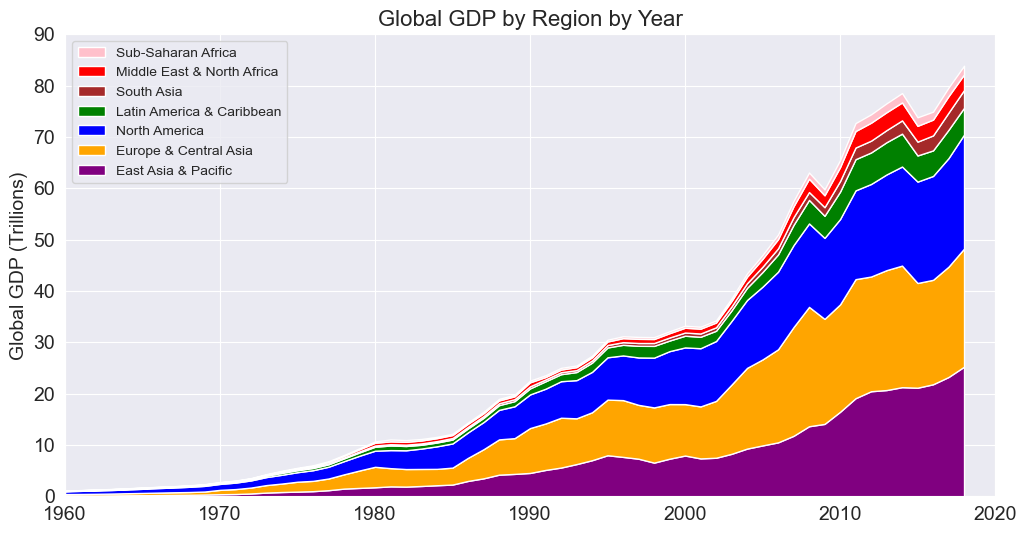

In [20]:
# Create a stacked area chart showing the growth of GDP over time, 
# with each stack representing a geographic region.

sns.set_style('darkgrid')
figure, axis = plt.subplots(figsize=(12,6))
axis.stackplot(gdp_pivot.index,
               [gdp_pivot[region]/1000 for region in sorted_gdp_regions],
               labels=sorted_gdp_regions,
               colors=[region_color_dict[region] for region in sorted_gdp_regions]
              )
axis.set_ylabel('Global GDP (Trillions)', fontsize=14)
axis.set_xlim(1960, 2020)
axis.set_ylim(0, 90)
axis.set_title('Global GDP by Region by Year', fontsize=16)
axis.tick_params(axis='both', which='major', labelsize=14)
axis.legend(reverse=True, fontsize=10, loc='upper left');

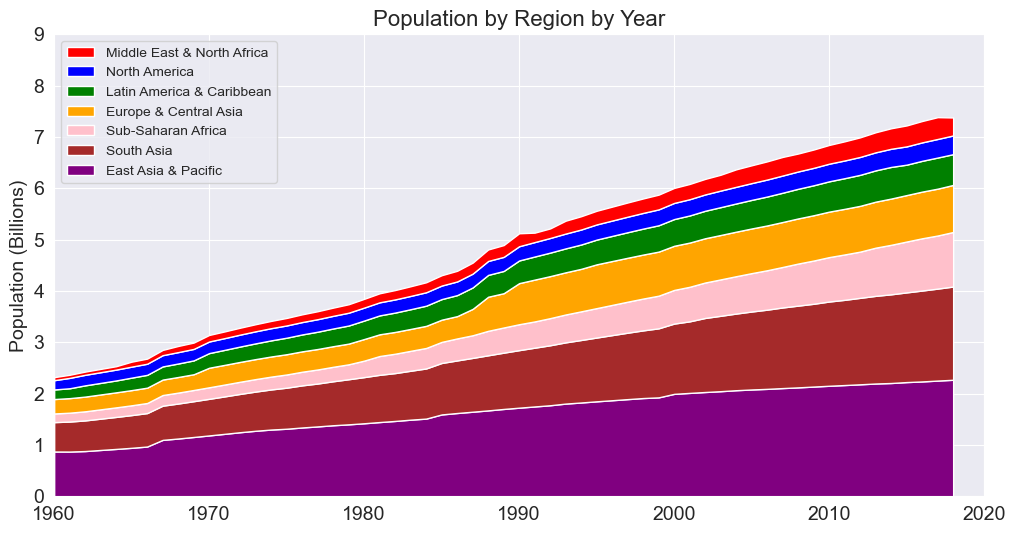

In [21]:
# Create a stacked area chart showing the growth of population over time, 
# with each stack representing a geographic region.

figure, axis = plt.subplots(figsize=(12, 6))
axis.stackplot(pop_pivot.index,
               [pop_pivot[region] for region in sorted_pop_regions],
               labels=sorted_pop_regions,
               colors=[region_color_dict[region] for region in sorted_pop_regions]
              )
axis.set_ylabel('Population (Billions)', fontsize=14)
axis.set_xlim(1960, 2020)
axis.set_ylim(0,9)
axis.set_title('Population by Region by Year', fontsize=16)
axis.tick_params(axis='both', which='major', labelsize=14)
axis.legend(reverse=True, fontsize=10, loc='upper left');

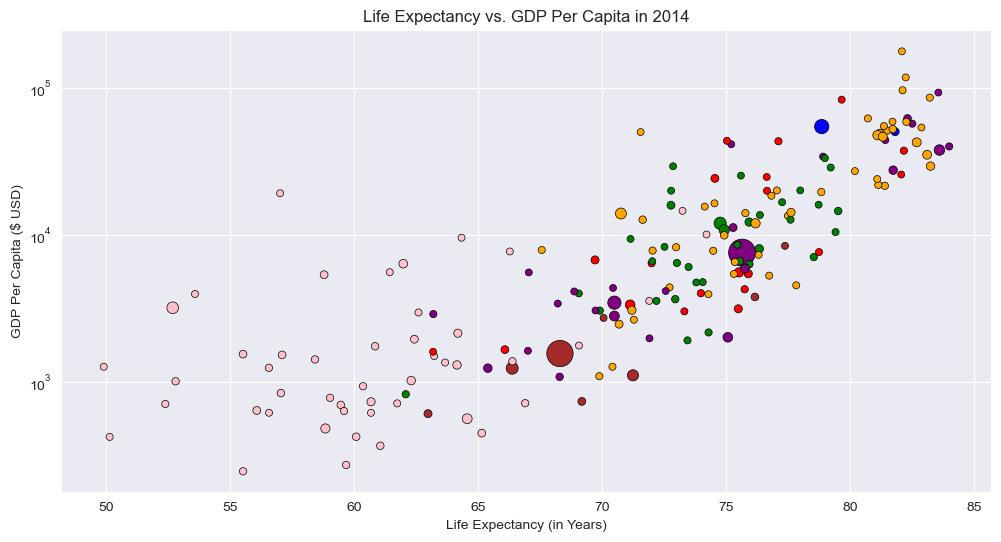

In [22]:
# Create a bubble chart with life expectancy for each country in the x-axis, 
# GDP per capita in the y-axis (log scale), and population as the bubble size. 
# Color the bubbles by region using the same colors for each as in the previous charts.

figure, axis = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='life_exp', y='gdp_pc_usd', size='population_mm', sizes=(25, 375), 
                data=wb_hdi_2014, hue='region', palette=region_color_dict,
                edgecolor='black', linewidth=0.5, legend=False)
axis.set_title('Life Expectancy vs. GDP Per Capita in 2014')
axis.set_xlabel('Life Expectancy (in Years)')
axis.set_ylabel('GDP Per Capita ($ USD)')
plt.yscale('log');

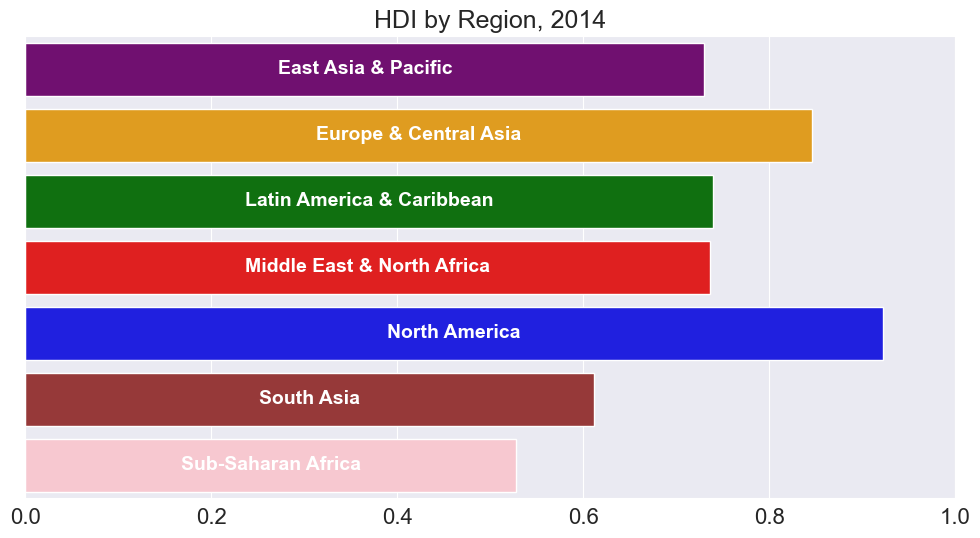

In [23]:
# Create a bar chart of average HDI by region (make sure the region colors match).

figure, axis = plt.subplots(figsize=(12, 6))

sns.barplot(y='region', 
            x='hdi_2014', 
            data=wb_hdi_by_region.reset_index().sort_values('hdi_2014', ascending=True),
            errorbar=None,
            palette=region_color_dict,
           )
axis.set_xlabel(None)
axis.set_ylabel(None)
axis.set_yticklabels([])
axis.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axis.set_yticks([])
axis.tick_params(axis='both', which='major', labelsize=16)
axis.set_title('HDI by Region, 2014', fontsize=18)
axis.bar_label(axis.containers[0], 
                labels=sorted_hdi_regions,
                label_type='center', fontsize=14, fontweight='bold', color='white');

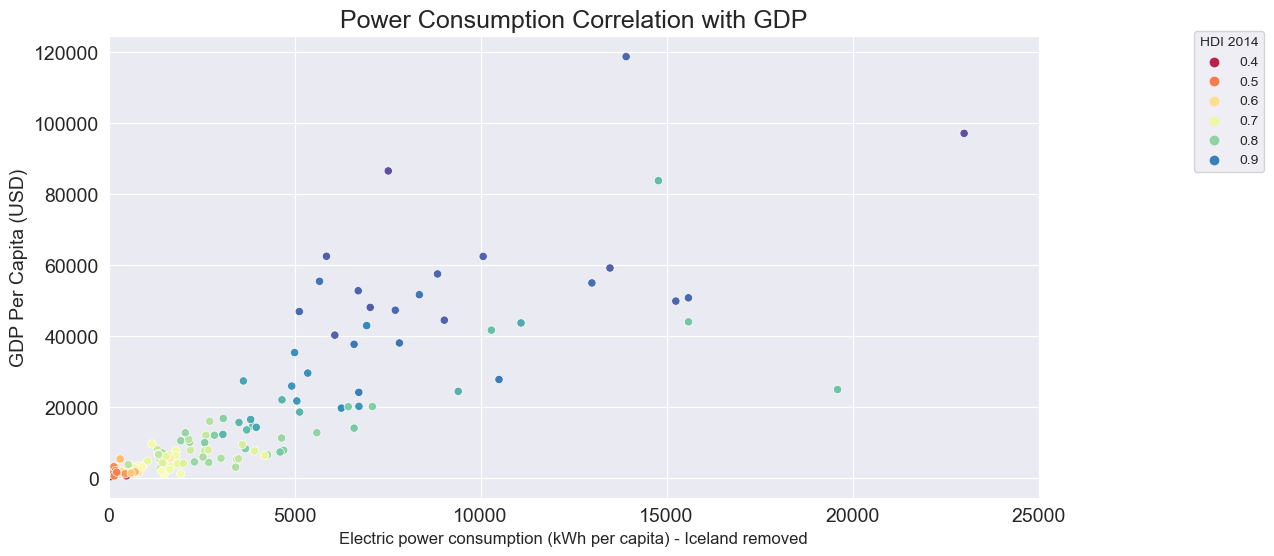

In [24]:
# Create a scatterplot with power consumption in the x-axis and GDP per capita in the y-axis, 
# then use HDI as a color scale for the dots (make sure to remove outliers like Iceland).

figure, axis = plt.subplots(figsize=(12, 6))

sns.scatterplot(x='kwh_pc', y='gdp_pc_usd', data=wb_hdi_2014, 
                hue='hdi_2014', palette='Spectral', sizes=(150, 320))
axis.legend(title='HDI 2014', fontsize=10, loc='upper right', bbox_to_anchor=(1.25, 1.025))
axis.set_xlim(0, 25000)
axis.set_xlabel('Electric power consumption (kWh per capita) - Iceland removed', fontsize=12)
axis.set_ylabel('GDP Per Capita (USD)', fontsize=14)
axis.tick_params(axis='both', which='major', labelsize=14)
axis.set_title('Power Consumption Correlation with GDP', fontsize=18);

/var/folders/hb/xzsd2cc57yz8p066czpqpnh80000gr/T/ipykernel_58818/3514953449.py:202: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('global_trends');
/Users/mccmatt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


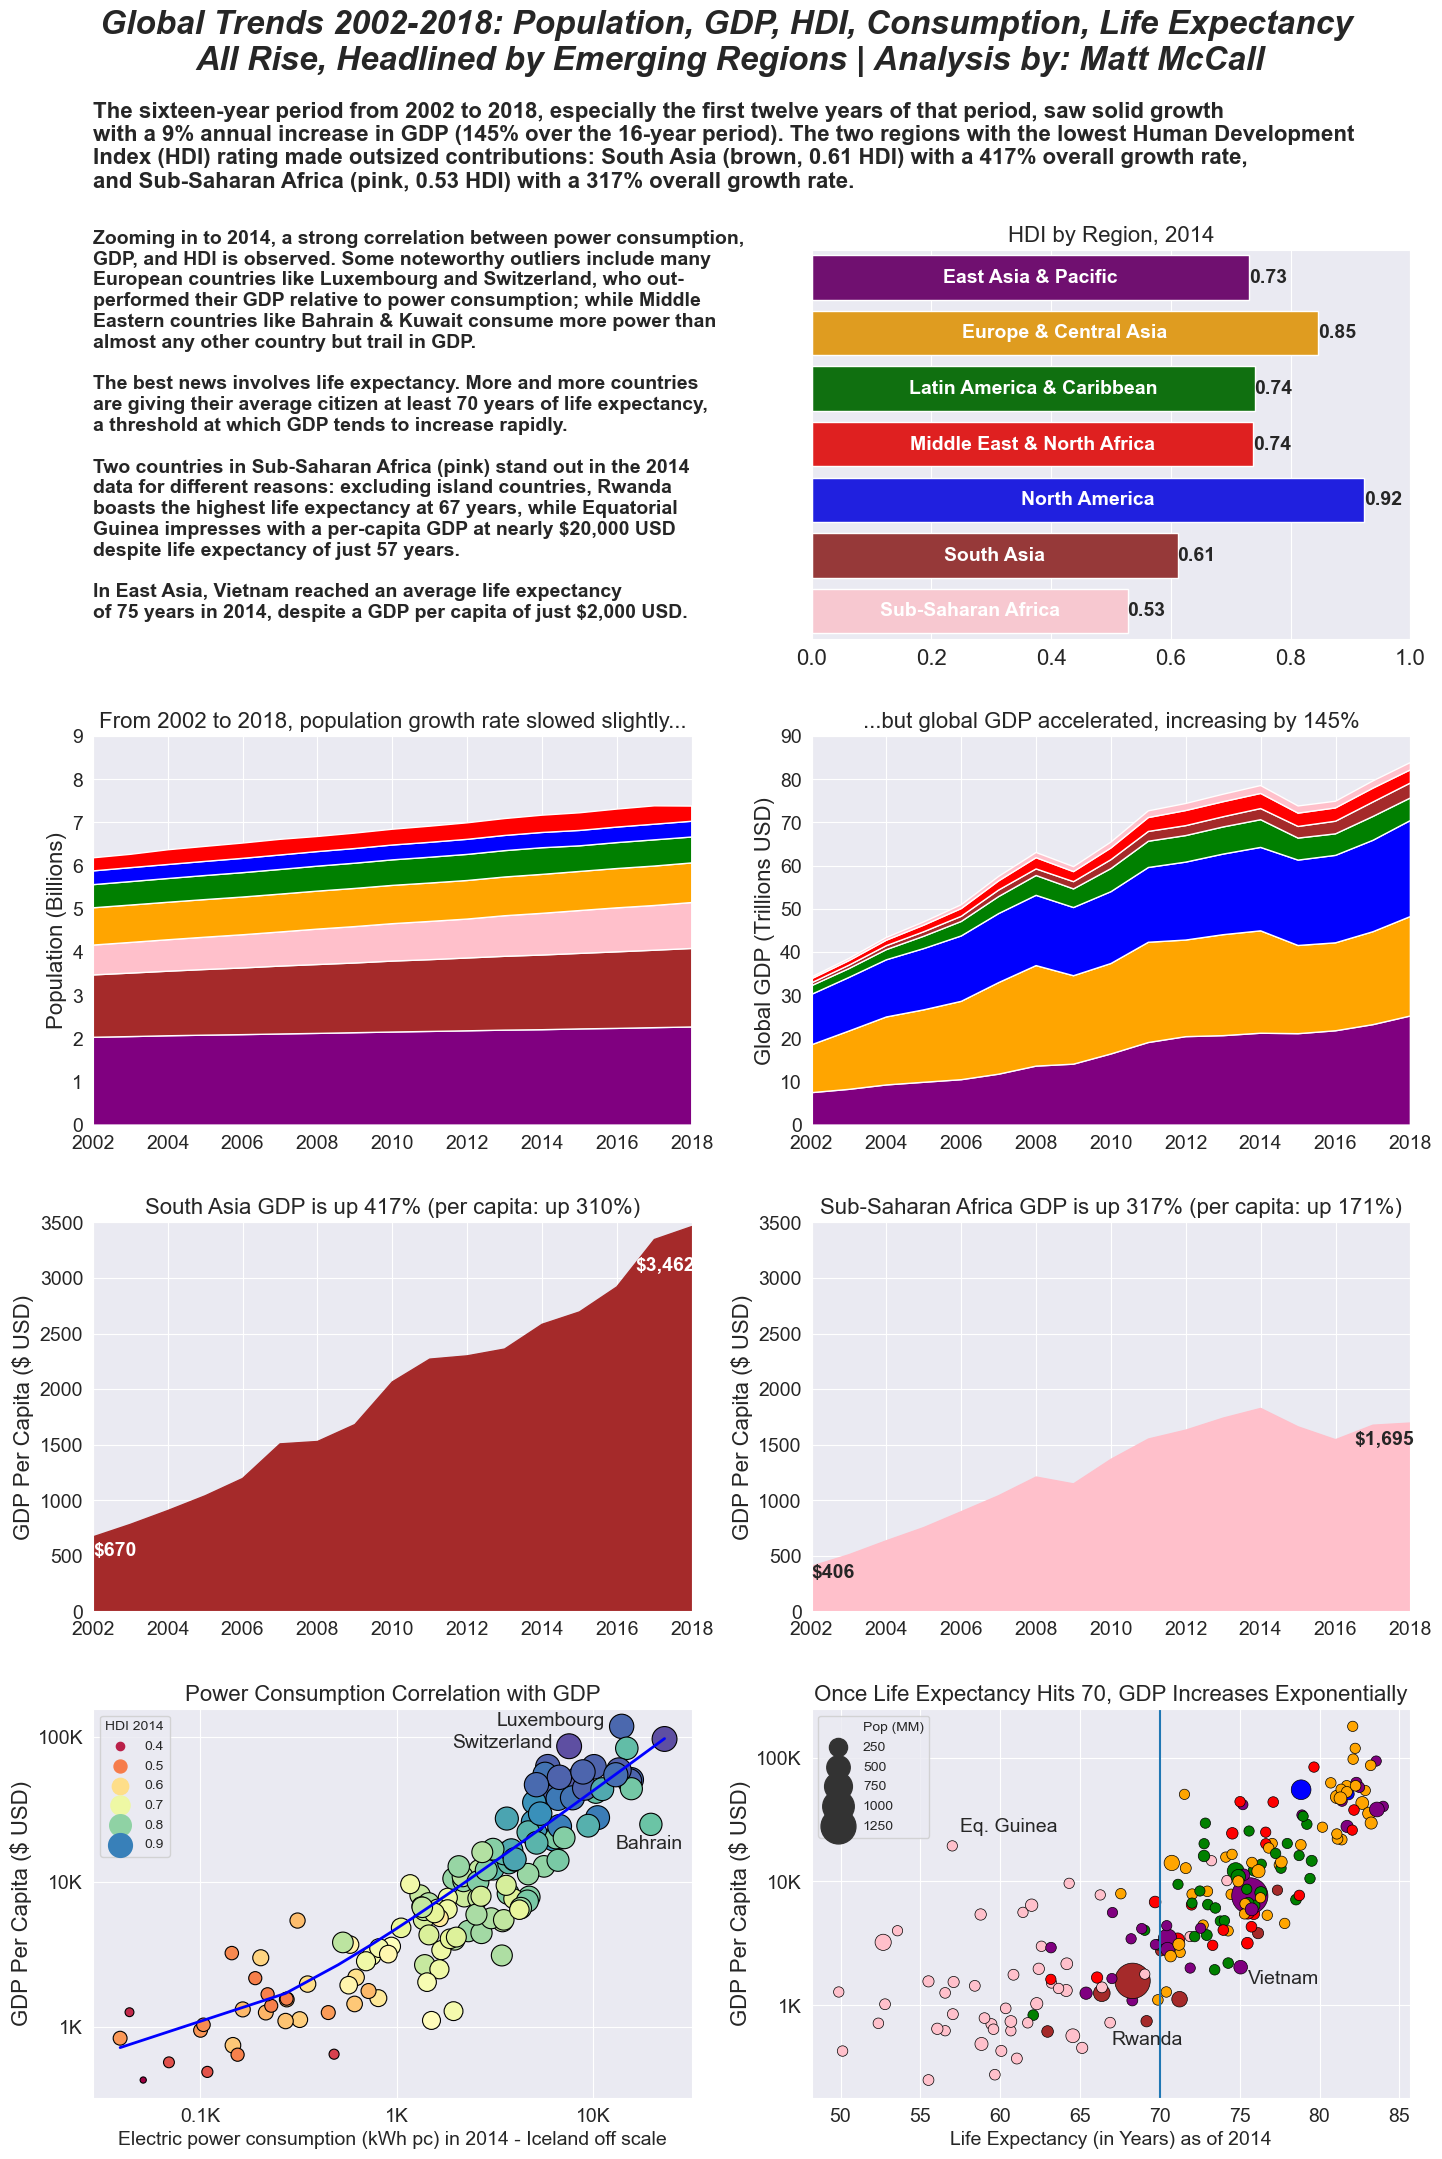

In [26]:
import matplotlib.gridspec as gridspec 
from matplotlib.ticker import FuncFormatter
figure = plt.figure(figsize=(17, 24), constrained_layout=True)
gs = gridspec.GridSpec(nrows=4, ncols=2, wspace=0.2, hspace=0.25)

figure.suptitle('''Global Trends 2002-2018: Population, GDP, HDI, Consumption, Life Expectancy 
All Rise, Headlined by Emerging Regions | Analysis by: Matt McCall''', 
                fontsize=24, fontweight='bold', fontstyle='oblique')

# Upon examination, the data indicating that total GDP started increasing sharply as of 2002 was partially 
# due to missing data for many countries prior to 2022. This analysis begins at that year for this reason.
# It *does* appear based on the raw data that GDP increased more rapidly starting in 2002,
# but many countries were missing prior to 2002 and I did not want that to affect my analysis.

# Note: I did not lay out the visuals in the exact order specified by the solution video, 
# because I did not click on the solution video prior to finishing my layout.


axis1 = figure.add_subplot(gs[0, 0])
axis2 = figure.add_subplot(gs[0, 1])
axis3 = figure.add_subplot(gs[1, 0])
axis4 = figure.add_subplot(gs[1, 1])
axis5 = figure.add_subplot(gs[2, 0])
axis6 = figure.add_subplot(gs[2, 1])
axis7 = figure.add_subplot(gs[3, 0])
axis8 = figure.add_subplot(gs[3, 1])


sns.barplot(y='region', 
            x='hdi_2014', 
            data=wb_hdi_by_region.reset_index().sort_values('hdi_2014', ascending=True),
            errorbar=None,
            palette=region_color_dict,
            ax=axis2)
axis2.set_title('HDI by Region, 2014', fontsize=16)
axis2.set_ylabel(None)
axis2.set_xlabel(None)
axis2.tick_params(axis='both', which='major', labelsize=16)


axis2.set_yticklabels([])
axis2.set_xticks([0.00, 0.20, 0.40, 0.60, 0.80, 1.00])
axis2.set_yticks([])
axis2.bar_label(axis2.containers[0], labels=sorted_hdi_regions,
                label_type='center', fontsize=14, fontweight='bold', color='white')
axis2.bar_label(axis2.containers[0], labels=sorted_hdi_values,
                label_type='edge', fontsize=14, fontweight='bold')


axis3.stackplot(pop_pivot.index,
                [pop_pivot[region] for region in sorted_pop_regions],
                labels=sorted_pop_regions,
                colors=[region_color_dict[region] for region in sorted_pop_regions])
axis3.set_title('From 2002 to 2018, population growth rate slowed slightly...', fontsize=16)
axis3.set_ylabel('Population (Billions)', fontsize=16)
axis3.tick_params(axis='both', which='major', labelsize=14)
axis3.set_ylim(0, 9)
axis3.set_xlim(2002, 2018)


axis4.stackplot(gdp_pivot.index,
                [gdp_pivot[region]/1000 for region in sorted_gdp_regions],
                labels=sorted_gdp_regions,
                colors=[region_color_dict[region] for region in sorted_gdp_regions])
axis4.set_title('...but global GDP accelerated, increasing by 145%', fontsize=16)
axis4.set_ylabel('Global GDP (Trillions USD)', fontsize=16)
axis4.tick_params(axis='both', which='major', labelsize=14)
axis4.set_ylim(0, 90)
axis4.set_xlim(2002, 2018)


axis5.stackplot(gdp_pivot.index,
                gdp_pivot['South Asia'],
                color='brown')
axis5.set_title('South Asia GDP is up 417% (per capita: up 310%)', fontsize=16)
axis5.set_ylabel('GDP Per Capita ($ USD)', fontsize=16)
axis5.tick_params(axis='both', which='major', labelsize=14)
axis5.set_ylim(0, 3500)
axis5.set_xlim(2002, 2018)

axis5.text(2002, 500, '$670', fontsize=14, fontweight='bold', color='white')
axis5.text(2016.5, 3062, '$3,462', fontsize=14, fontweight='bold', color='white')


axis6.stackplot(gdp_pivot.index,
                gdp_pivot['Sub-Saharan Africa'],
                color='pink')
axis6.set_title('Sub-Saharan Africa GDP is up 317% (per capita: up 171%)', fontsize=16)
axis6.set_ylabel('GDP Per Capita ($ USD)', fontsize=16)
axis6.tick_params(axis='both', which='major', labelsize=14)
axis6.set_ylim(0, 3500)
axis6.set_xlim(2002, 2018)

axis6.text(2002, 300, '$406', fontsize=14, fontweight='bold')
axis6.text(2016.5, 1500, '$1,695', fontsize=14, fontweight='bold')


#axis3.legend(reverse=True, fontsize=10, loc='upper left')
#axis4.legend(reverse=True, fontsize=10, loc='upper left')
#axis5.legend(reverse=True, fontsize=10, loc='upper left')
#axis6.legend(reverse=True, fontsize=10, loc='upper left')


def format_yticks(value, pos):
    # Convert scientific notation to standard format
    if value < 1000:
        return '{:.1f}K'.format(value/1000)
    else:
        return '{:,.0f}K'.format(value/1000)

def format_yticks_k(value, pos):
    # Convert scientific notation to standard format
    return '{:,.1f}K'.format(value/1000)

sns.regplot(x='kwh_pc', y='gdp_pc_usd', 
            data=wb_hdi_2014.query("country_name != 'Iceland'"), 
            scatter=False,
            line_kws={'color': 'blue', 'linewidth': 2}, ci=None, ax=axis7)
sns.scatterplot(x='kwh_pc', 
                y='gdp_pc_usd', 
                data=wb_hdi_2014.query("country_name != 'Iceland'"), 
                hue='hdi_2014', 
                palette='Spectral',
                size='hdi_2014', 
                sizes=(20, 320), 
                edgecolor='black',
                ax=axis7)
axis7.set_title('Power Consumption Correlation with GDP', fontsize=16)
axis7.set_ylabel('GDP Per Capita ($ USD)', fontsize=16)
axis7.set_xlabel('Electric power consumption (kWh pc) in 2014 - Iceland off scale', fontsize=14)
axis7.tick_params(axis='both', which='major', labelsize=14)
axis7.set_yscale('log')
axis7.set_xscale('log')

axis7.text(13000, 17000, 'Bahrain', fontsize=14)
axis7.text(1900, 85000, 'Switzerland', fontsize=14)
axis7.text(3200, 120000, 'Luxembourg', fontsize=14)
axis7.legend(title='HDI 2014', fontsize=10, loc='upper left')
axis7.xaxis.set_major_formatter(FuncFormatter(format_yticks))
axis7.yaxis.set_major_formatter(FuncFormatter(format_yticks))


sns.scatterplot(x='life_exp', 
                y='gdp_pc_usd', 
                data=wb_hdi_2014.rename(columns={'population_mm': 'Pop (MM)'}), 
                size='Pop (MM)', 
                sizes=(min(wb_hdi_2014['population_mm']*5000), max(wb_hdi_2014['population_mm']/2)), 
                hue='region', 
                palette=region_color_dict, 
                edgecolor='black', 
                linewidth=0.5, 
                ax=axis8)
axis8.set_title('Once Life Expectancy Hits 70, GDP Increases Exponentially', fontsize=16)
axis8.set_ylabel('GDP Per Capita ($ USD)', fontsize=16)
axis8.set_xlabel('Life Expectancy (in Years) as of 2014', fontsize=14)
axis8.tick_params(axis='both', which='major', labelsize=14)
axis8.set_yscale('log')

axis8.axvline(70)
axis8.text(67, 480, 'Rwanda', fontsize=14)
axis8.text(57.5, 25000, 'Eq. Guinea', fontsize=14)
axis8.text(75.5, 1500, 'Vietnam', fontsize=14)
handles, labels = axis8.get_legend_handles_labels()
axis8.legend(handles[8:], labels[8:], loc='upper left')

# Apply the custom formatter to y-axis
axis8.yaxis.set_major_formatter(FuncFormatter(format_yticks))


axis1.set_axis_off()
axis1.text(x=0, 
           y=1.16, 
           fontsize=16, 
           fontweight='bold',
           s='''The sixteen-year period from 2002 to 2018, especially the first twelve years of that period, saw solid growth 
with a 9% annual increase in GDP (145% over the 16-year period). The two regions with the lowest Human Development 
Index (HDI) rating made outsized contributions: South Asia (brown, 0.61 HDI) with a 417% overall growth rate, 
and Sub-Saharan Africa (pink, 0.53 HDI) with a 317% overall growth rate.''')
axis1.text(x=0, y=0, fontsize=14, fontweight='bold',
           s='''Zooming in to 2014, a strong correlation between power consumption, 
GDP, and HDI is observed. Some noteworthy outliers include many 
European countries like Luxembourg and Switzerland, who out-
performed their GDP relative to power consumption; while Middle 
Eastern countries like Bahrain & Kuwait consume more power than 
almost any other country but trail in GDP.

The best news involves life expectancy. More and more countries
are giving their average citizen at least 70 years of life expectancy, 
a threshold at which GDP tends to increase rapidly.

Two countries in Sub-Saharan Africa (pink) stand out in the 2014 
data for different reasons: excluding island countries, Rwanda 
boasts the highest life expectancy at 67 years, while Equatorial 
Guinea impresses with a per-capita GDP at nearly $20,000 USD 
despite life expectancy of just 57 years.

In East Asia, Vietnam reached an average life expectancy 
of 75 years in 2014, despite a GDP per capita of just $2,000 USD.
''')


plt.savefig('global_trends');

In [27]:
gdp_hdi_comparison = wb_hdi_2014.loc[:, ['hdi_2014', 'gdp_pc_usd']]
gdp_hdi_comparison.corr().round(2)

,hdi_2014,gdp_pc_usd
hdi_2014,1.00,0.65
gdp_pc_usd,0.65,1.00
